In [1]:
import json
import pickle as p
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.datasets import mnist
data = {}
(data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()

In [2]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(data['X_train'].shape))
print('Y_train: ' + str(data['Y_train'].shape))
print('X_test:  '  + str(data['X_test'].shape))
print('Y_test:  '  + str(data['Y_test'].shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


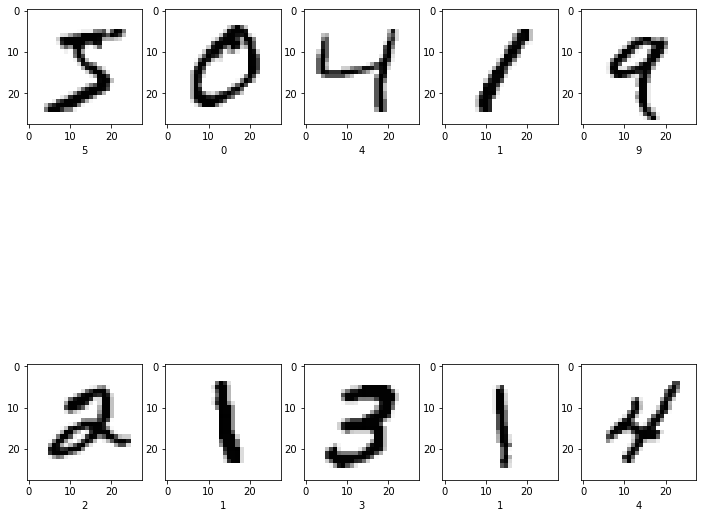

In [3]:
def plot_i(data=data, i=None, subplots=[]):
    
    if not i:
        fig = plt.figure(figsize=(12, 12))
        for i in range(10):
            plottable_image = np.reshape(data['X_train'][subplots[i]], (28, 28))
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(plottable_image, cmap='gray_r')
            ax.set_xlabel(data['Y_train'][i])
#             print(data['Y_train'][i])
    else:
        print('Y = {}'.format(Y_train[i]))
        plt.figure()
        plt.imshow(X_train[i])
        plt.grid(False)
        plt.show()

plot_i(subplots=np.arange(10))

In [4]:
# %%writefile mlfuncs.py
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from tensorflow import keras
# import json
# import pickle

# from tensorflow.keras.datasets import mnist
# data = {}
# (data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()

def make_model(data=data):
    model = None
    data['X_train'] = data['X_train']/255.
    data['X_test'] = data['X_test']/255.
    
    data['X_train'] = data['X_train'].reshape((60000, 784, ))
    data['X_test'] = data['X_test'].reshape((10000, 784, ))
    
    model = keras.Sequential([
#         keras.layers.Flatten(input_shape=(28, 28)),
        
        keras.layers.Dense(16, activation='relu', input_shape=(784,)),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy']
                 )
    return model

def fit_data(data, model):
    print(data['X_train'].shape)
    model.fit(data['X_train'], data['Y_train'], epochs=3,
              validation_data=(data['X_test'], data['Y_test']))
    return model

def train_model():
    data = {}
    (data['X_train'], data['Y_train']), (data['X_test'], data['Y_test']) = mnist.load_data()
    model = make_model(data=data)
    model = fit_data(data, model)
    
    _, test_acc = model.evaluate(data['X_test'],  data['Y_test'], verbose=2)
    print('\nTest accuracy:', test_acc)
    
    return model

def get_params(model):
    weights=[]
    for i in range(len(model.layers)):
#         weights.append(layer.get_weights()[0].tolist())
#         weights.append(layer.get_weights()[1].tolist())
        weights.append([model.layers[i].get_weights()[0].tolist(),
                        model.layers[i].get_weights()[1].tolist()])
    return weights

def get_params_json(weights, ret_dict = False):
    dat = {}
    for i in range(len(weights)):
        sdat = {}
        sdat['weights'] = weights[i][0]
        sdat['biases'] = weights[i][1]
#         print(len(weights[i][0]), len(weights[i][0][0]))
        dat['layer'+str(i)] = sdat
#         print(len(dat['layer'+str(i)]['weights']), len(dat['layer'+str(i)]['weights'][0]))

    with open('dat.dict', 'wb') as f:
        p.dump(dat, f)
        f.close()
        print()
        
    if ret_dict: return dat

    dat = json.dumps(dat)
    
    return dat

In [24]:
# Call this function to reset weights
def reset_weights(ret_dict=False):
    if ret_dict:
        params_json = get_params_json(get_params(train_model()), ret_dict=True)
        return params_json
    
    params_json = get_params_json(get_params(train_model()))
    return params_json

# Call this function to get dat from the pickle of {dat}
def get_weights(ret_dict=False):
    if ret_dict: 
        dat = reset_weights(ret_dict = True)
        return dat
    
    try:
        with open('dat.dict', 'rb') as f:
            dat = p.load(f)
            f.close()
            dat = json.dumps(dat)
            print('get data from pickle')
            
    except:
        dat = reset_weights()
        print('restting data')
        
    return dat

In [25]:
dat = get_weights(ret_dict = True)

(60000, 784)
Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6405 - accuracy: 0.8538 - val_loss: 1.5539 - val_accuracy: 0.9205
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5498 - accuracy: 0.9220 - val_loss: 1.5412 - val_accuracy: 0.9290
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5378 - accuracy: 0.9310 - val_loss: 1.5357 - val_accuracy: 0.9313
313/313 - 0s - loss: 1.5357 - accuracy: 0.9313

Test accuracy: 0.9312999844551086



In [28]:
# layer0: (784, 16) and (16, )
# layer1: (16, 10) adn (10, )

dat['layer0'] 

{'weights': [[0.0255800262093544,
   -0.0740916058421135,
   0.01504921168088913,
   -0.02177249640226364,
   -0.04999909922480583,
   0.07229793071746826,
   -0.01547655463218689,
   0.04071764647960663,
   0.01935870200395584,
   3.262609243392944e-05,
   -0.01373058557510376,
   -0.007526606321334839,
   0.01269058883190155,
   0.0307793989777565,
   0.05804307758808136,
   -0.07937391847372055],
  [0.07319937646389008,
   0.07862025499343872,
   -0.05553046241402626,
   -0.04318281263113022,
   -0.05646646022796631,
   0.07957221567630768,
   0.01720556616783142,
   0.04062528908252716,
   -0.03770427033305168,
   0.05358587205410004,
   0.008788898587226868,
   -0.04745481163263321,
   0.07186229526996613,
   0.007944703102111816,
   -0.04061523824930191,
   0.05979698896408081],
  [0.0476912260055542,
   0.04358547925949097,
   0.053970783948898315,
   0.021639570593833923,
   -0.016732051968574524,
   0.04955267906188965,
   -0.05896090716123581,
   0.03450045734643936,
   -0.07

In [19]:
dat

'{"layer0": {"weights": [[-0.02615237981081009, -0.009282894432544708, 0.04091241955757141, 0.00791032612323761, -0.004259198904037476, 0.04982900619506836, -0.024212636053562164, -0.014433972537517548, 0.024841174483299255, -0.08609097450971603, 0.05780531466007233, 0.03310616314411163, 0.016657643020153046, -0.0402301587164402, -0.014084629714488983, -0.02132692188024521], [-0.029344692826271057, 0.03983372449874878, 0.04356120526790619, 0.07432249188423157, 0.0023580044507980347, -0.04049579054117203, -0.08339349925518036, -0.04375531151890755, 0.00019972771406173706, 0.038201093673706055, 0.012748047709465027, 0.08237014710903168, -0.048733748495578766, -0.01937101036310196, 0.057447776198387146, -0.04961641505360603], [-0.037743065506219864, 0.07164408266544342, -0.05306323245167732, 0.032827228307724, -0.02393527328968048, -0.033971358090639114, 0.08295650780200958, -0.048950158059597015, 0.06565767526626587, -0.04304653778672218, 0.005956597626209259, 0.07771466672420502, 0.0727